In [117]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [118]:
def Heaviside(n,epsilon,z):
    if n==1:
        if z> epsilon:
            return 1
        if z<-epsilon:
            return 0
        else:
            return (1/2)*(1+z/epsilon+np.sin(np.pi*z/epsilon)/np.pi)
    else:
        return (1/2)*(1+(2/np.pi)*(np.arctan(z/epsilon)))

def DiracDelta(n,epsilon,z,i):
    return Heaviside(n,epsilon,z[i])-Heaviside(n,epsilon,z[i-1])

def div(phi):
    return np.sum(np.gradient(phi),axis=0)

In [168]:
Image = cv2.imread('rose.tif')

img = cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
noise = np.random.normal(0,20,img.shape)
#img = img+noise
[M,N]=img.shape

phi0=cv2.imread('reference.png')
phi0=cv2.cvtColor(phi0,cv2.COLOR_BGR2GRAY)
phi0=cv2.resize(phi0, (N,M), interpolation = cv2.INTER_AREA)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


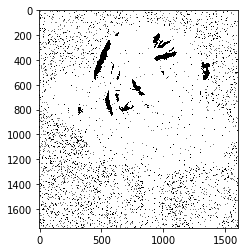

In [169]:
plt.imshow(div(Image))

In [170]:
def minus_plus(Image):
    [x,y,z]=Image.shape
    ind = Image>=0
    pp=Image[ind]
    pp=plus.reshape(x,y,z)
    mm=Image[~ind]
    mm=minus.reshape(x,y,z)
    return pp,mm

In [179]:
def E_cv(phi,nu,epsilon):
    ind= phi>=0
    u_p=np.mean(phi[ind])
    u_m=np.mean(phi[~ind])
    
    gray_value_variance           = np.sum(np.sum((I-u_p)**2*Heaviside(2,epsilon,phi)))+np.sum(np.sum((I-u_m)**2*(1-Heaviside(2,epsilon,phi))))
    length_of_separating_boundary = nu*np.sum(np.sum(np.abs(DiracDelta(phi))))
    
    E_cv = gray_value_variance+length_of_separating_boundary
    return E_cv

E_cv(img,0.1,0.1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NameError: name 'I' is not defined

In [176]:
def distance(phi1,phi2):
    return np.sum(np.sum( (Heaviside(2,0.1,phi1)-Heaviside(2,0.1,phi2) )**2 ))

distance(img,phi0)

21603.390433919318

In [177]:
def E_shape(phi):
    return distance(phi,phi0)*distance(phi,phi0)

E_shape(img)

466706478.2403567

In [129]:
def partial_phi(phi,nu):
    ind= phi>=0
    u_p=np.mean(phi[ind])
    u_m=np.mean(phi[~ind])
    epsilon=2
    Dirac = Heaviside(2,epsilon,phi)-Heaviside(2,epsilon,phi)
    partial_phi=Dirac*(nu*div((np.gradient(phi)/np.abs(np.gradient(phi))))-(I-u_p)**2-(I-u_m)**2)
    return partial_phi

In [180]:
def E_total(phi,alpha):
    return E_cv(phi)+alpha*E_shape(phi)

E_total(img,1)

TypeError: E_cv() missing 2 required positional arguments: 'nu' and 'epsilon'

In [181]:
def E_shape_translation_invariance(phi):
    return np.sum(np.sum(   (Heaviside(2,0.1,phi)-Heaviside(2,0.1,phi0))**2   ))

In [186]:
def center_of_gravity(phi0):
    hphi=Heaviside(2,0.1,phi0)/ np.sum(np.sum(Heaviside(2,0.1,phi0) ))
    return np.sum(np.sum( phi0 * hphi ))

center_of_gravity(phi0)

248.59701724336446

In [134]:
def intrinsic_scale(phi):
    hphi=Heaviside()*phi/ np.sum(np.sum(Heaviside()*phi ))
    return np.sqrt(np.sum(np.sum(  (x-mu)**2 *hphi   )))

In [135]:
def E_shape_translation_scale_invariance(phi):
    np.sum(np.sum( (Heaviside()*phi(sigma(phi)*x+center_of_gravity(phi))-Heaviside()*phi0 )**2   ))